<a href="https://colab.research.google.com/github/MJAHMADEE/Shallow-convolutional-neural-network-for-image-classification/blob/main/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/25
415/422 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.7439
Epoch 1: val_loss improved from inf to 0.41970, saving model to best_model.h5
422/422 [==============================] - 4s 6ms/step - loss: 0.6903 - accuracy: 0.7452 - val_loss: 0.4197 - val_accuracy: 0.8433
Epoch 2/25
413/422 [============================>.] - ETA: 0s - loss: 0.4359 - accuracy: 0.8408
Epoch 2: val_loss improved from 0.41970 to 0.34625, saving model to best_model.h5
422/422 [==============================] - 2s 5ms/step - loss: 0.4352 - accuracy: 0.8411 - val_loss: 0.3463 - val_accuracy: 0.8743
Epoch 3/25
421/422 [============================>.] - ETA: 0s - loss: 0.3720 - accuracy: 0.8645
Epoch 3: val_loss improved from 0.34625 to 0.31696, saving model to best_model.h5
422/422 [==============================] - 3s 6ms/step - loss: 0.3720 - accuracy: 0.8645 - val_loss: 0.3170 - val_accuracy: 0.8803
Epoch 4/25
417/422 [============================>.] - ETA: 0s - loss: 0.3394 

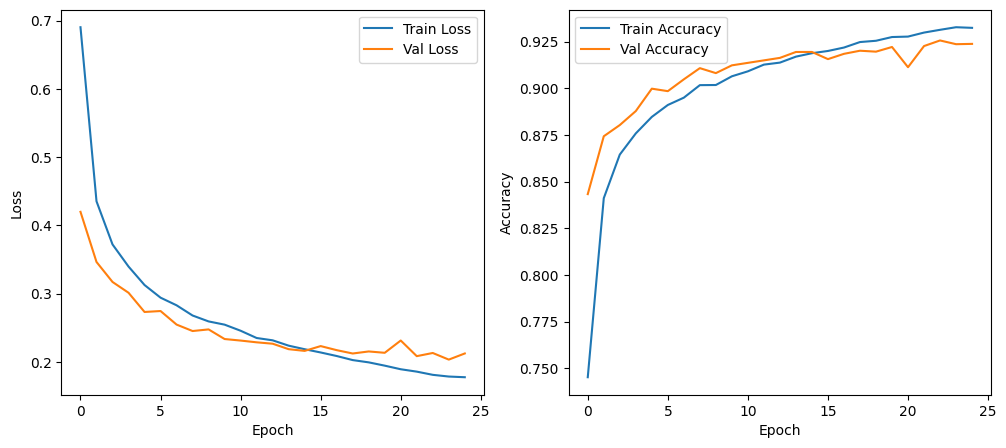

313/313 [==============================] - 1s 2ms/step


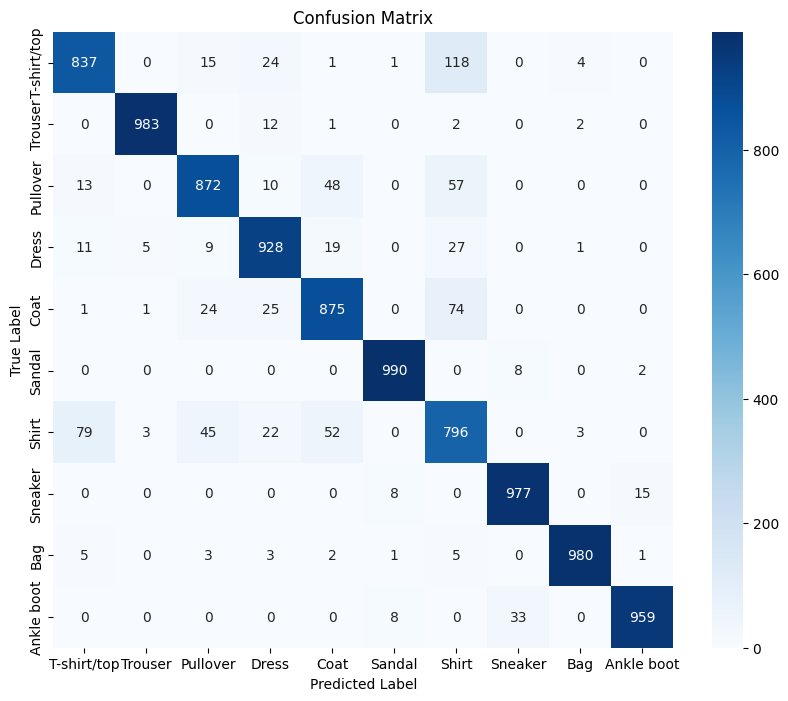

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.84      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.87      0.89      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.88      0.88      0.88      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.74      0.80      0.77      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Best Model - Test Loss: 0.22681398689746857
Best Model - Test Accuracy: 0.919700026512146


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Step 1: Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 2: Split the data into train, val, and test sets
val_split = 0.1
val_samples = int(val_split * x_train.shape[0])

x_val = x_train[-val_samples:]
y_val = y_train[-val_samples:]
x_train = x_train[:-val_samples]
y_train = y_train[:-val_samples]

# Step 3: Create the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model and save the best model based on validation accuracy
checkpoint_filepath = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# # If Use callbacks=[checkpoint_callback, lr_scheduler, early_stopping] in history
# def lr_schedule(epoch):
#     initial_lr = 0.001
#     drop = 0.5
#     epochs_drop = 5
#     lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
#     return lr
# lr_scheduler = LearningRateScheduler(lr_schedule)
# early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])

# Step 6: Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot loss and accuracy for train and validation sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate the confusion matrix and classification report for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Evaluate the best model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Best Model - Test Loss:", loss)
print("Best Model - Test Accuracy:", accuracy)


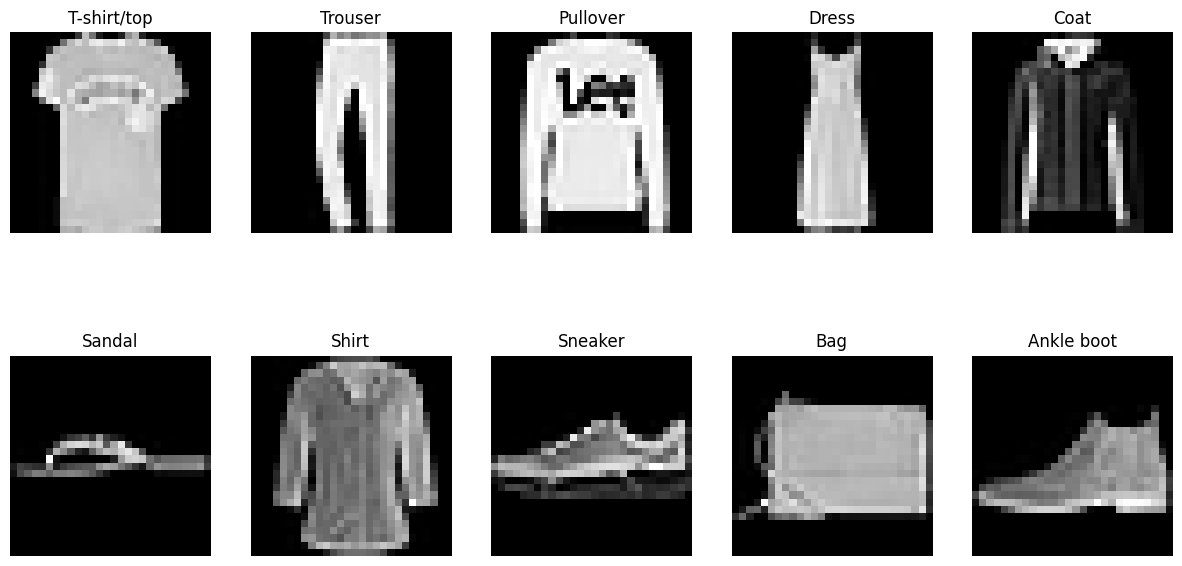

In [ ]:
def plot_samples_with_names(x_data, y_data, class_names):
    num_classes = len(class_names)
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    fig.subplots_adjust(hspace=0.5)

    for i, ax in enumerate(axes.flat):
        class_idx = np.argmax(y_data, axis=1)
        class_samples = x_data[class_idx == i]
        sample = class_samples[0].reshape(28, 28) * 255.0
        ax.imshow(sample, cmap='gray')
        ax.set_title(class_names[i])
        ax.axis('off')

    plt.show()

plot_samples_with_names(x_test, y_test, class_names)

1/1 [==============================] - 0s 234ms/step


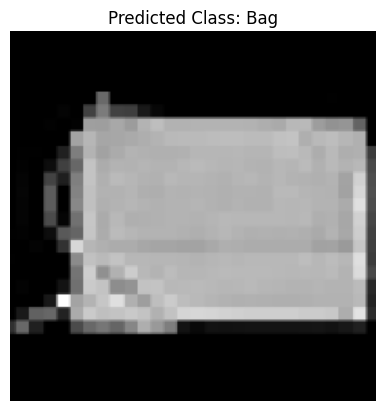

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the saved best model
model = load_model('best_model.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    image = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    image = img_to_array(image)
    image = preprocess_input(image)
    image = image.reshape(1, 28, 28, 1)
    return image

# Function to get the class name from the predicted class index
def get_class_name(class_index):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return class_names[class_index]

# Path to the image you want to predict
image_path = '/content/Test2.png'

# Load and preprocess the image
image = load_and_preprocess_image(image_path)

# Use the model to predict the class
predicted_probs = model.predict(image)
predicted_class_index = np.argmax(predicted_probs)
predicted_class_name = get_class_name(predicted_class_index)

# Display the image along with the predicted class
plt.imshow(load_img(image_path))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()
